In [1]:
!pip install shap

In [2]:
!pip install pycaret

In [1]:
import numpy as np
import pandas as pd
from pycaret.regression import *

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
#maybe use pycaret for input
#read data from csv
df = pd.read_csv('data_cleaned_2021.csv')
df.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),company_txt,Job Location,Age,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research,NM,48,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,data scientist,na,M
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,University of Maryland Medical System,MD,37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,na,M
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0,KnowBe4,FL,11,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,data scientist,na,M
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5,PNNL,WA,56,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,na,na
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5,Affinity Solutions,NY,23,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,data scientist,na,na


In [3]:
#display the number of rows and columns 
df.shape

(742, 42)

In [4]:
#display the unique job title values simplified 
df['job_title_sim'].unique()

array(['data scientist', 'other scientist', 'analyst', 'data engineer',
       'data analitics', 'na', 'data modeler',
       'Data scientist project manager', 'machine learning engineer',
       'director'], dtype=object)

In [5]:
#display the number of unique job title values simplified 
df['job_title_sim'].nunique()

10

In [6]:
#since there are fewer unique items in job_title_sim than 'Job Title' we will go with that column
#display the number of times each value in job_title_sim occurs
df['job_title_sim'].value_counts()

data scientist                    313
other scientist                   143
data engineer                     119
analyst                           101
machine learning engineer          22
Data scientist project manager     16
na                                 10
data analitics                      8
data modeler                        5
director                            5
Name: job_title_sim, dtype: int64

In [7]:
#print Job Location values
df['Job Location']

0      NM
1      MD
2      FL
3      WA
4      NY
       ..
737    MA
738    TN
739    PA
740    PA
741    OH
Name: Job Location, Length: 742, dtype: object

In [8]:
#print unique values
df['Job Location'].unique()

array(['NM', 'MD', 'FL', 'WA', 'NY', 'TX', 'CA', 'VA', 'MA', 'NJ', 'CO',
       'IL', 'KY', 'OR', 'CT', 'MI', 'DC', 'OH', 'AL', 'MO', 'PA', 'GA',
       'IN', 'LA', 'WI', 'NC', 'AZ', 'NE', 'MN', 'UT', 'TN', 'DE', 'ID',
       'RI', 'IA', 'SC', 'KS'], dtype=object)

In [9]:
#print number of unique values
df['Job Location'].nunique()

37

In [10]:
#print out the number of times each location appears 
df['Job Location'].value_counts().to_frame()

,Job Location
CA,152
MA,103
NY,72
VA,41
IL,40
MD,35
PA,33
TX,28
NC,21
WA,21


In [11]:
#since there are only 37 values in Job Location but there are 50 states (plus Washington DC) create a list with values 
#of all states and make sure it is appropriate length
states = ['AL','AK','AZ','AR','CA','CO','CT','DE','DC','FL','GA','HI',
          'ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI','MN','MS',
          'MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR',
          'PA','RI','SC','SD','TN','TX','UT','VT','VA','WA','WV','WI','WY']
print(len(states))

51


In [12]:
#this cell is mostly for our purposes so we are able to handle the state values that do not show up in the dataset. 
#create a list to hold locations that are missing 
missing_locations = []

#loop through states list and if item is not in Job Location title add to our missing_locations list 
for i in states:
  if str(i) not in[str(j)for j in df['Job Location']] :
    missing_locations.append(i)

#print missing_locations and the length 
print(missing_locations)
print(len(missing_locations))

['AK', 'AR', 'HI', 'ME', 'MS', 'MT', 'NV', 'NH', 'ND', 'OK', 'SD', 'VT', 'WV', 'WY']
14


In [13]:
#print Avg Salary(K) column 
df['Avg Salary(K)']

0       72.0
1       87.5
2       85.0
3       76.5
4      114.5
       ...  
737     84.5
738    102.5
739     73.5
740    127.5
741     93.5
Name: Avg Salary(K), Length: 742, dtype: float64

In [14]:
#display number of unique values
df['Avg Salary(K)'].nunique()

219

In [15]:
#print unique values
df['Avg Salary(K)'].unique()

array([ 72. ,  87.5,  85. ,  76.5, 114.5,  95. ,  73.5, 114. ,  61. ,
       140. , 163.5, 139. ,  65.5, 113.5, 146. , 102. , 153.5, 142.5,
       105.5,  96. , 112.5,  84. , 143. ,  86.5,  99.5,  47.5, 121. ,
       106. , 107. , 110. , 147.5,  88. ,  98.5,  82.5, 130. , 155. ,
       184.5,  29.5,  81. ,  91. ,  68. , 115. , 109.5,  75.5, 154.5,
       143.5, 139.5,  67. , 118. ,  79.5,  56.5, 128.5,  97.5,  66.5,
       179.5,  76. , 112. ,  98. , 128. , 150.5, 124. ,  77.5,  87. ,
        53.5,  85.5,  48. , 174. , 106.5,  72.5,  99. , 133. , 237.5,
        95.5, 104.5,  55. ,  61.5, 157. ,  78. , 132.5, 108. ,  80.5,
       107.5, 119.5, 134. , 100.5, 122. ,  92.5,  62. ,  39.5,  40.5,
        89.5, 147. ,  81.5, 168. ,  97. , 100. , 105. , 103.5, 137.5,
        84.5, 164. , 169. , 142. , 171.5, 145. ,  42. , 120. ,  71.5,
        51.5, 151.5, 225. , 161.5, 124.5, 148. ,  59. , 146.5,  91.5,
       140.5,  70.5,  93.5, 134.5, 181. , 205. ,  48.5,  44.5,  52.5,
        64. ,  54. ,

In [16]:
#create a new df with values we will need. Since we will be asking user for skill input, we need all columns that address skills.
#we will start with these columns
df_salary_ = df

In [17]:
df_salary_

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),company_txt,Job Location,Age,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research,NM,48,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,data scientist,na,M
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,University of Maryland Medical System,MD,37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,na,M
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0,KnowBe4,FL,11,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,data scientist,na,M
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5,PNNL,WA,56,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,na,na
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5,Affinity Solutions,NY,23,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,data scientist,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,950,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K (Glassdoor est.),Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+,1830,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion (USD),"Pfizer, AstraZeneca, Merck",0,0,58,111,84.5,GSK,MA,191,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,other scientist,sr,M
738,951,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 - 5000,2006,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"See Tickets, TicketWeb, Vendini",0,0,72,133,102.5,Eventbrite,TN,15,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,data engineer,sr,na
739,952,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 - 1000,1984,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,-1,0,0,56,91,73.5,Software Engineering Institute,PA,37,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,other scientist,na,P
740,953,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 - 50,-1,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),-1,0,0,95,160,127.5,"Numeric, LLC",PA,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,na,na


In [18]:
df_salary_.columns

Index(['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer provided', 'Lower Salary', 'Upper Salary',
       'Avg Salary(K)', 'company_txt', 'Job Location', 'Age', 'Python',
       'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit',
       'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an',
       'job_title_sim', 'seniority_by_title', 'Degree'],
      dtype='object')

In [19]:
#print our new dataframe 
df_salary_ = df_salary_.drop(['index','Job Title', 'Salary Estimate','Job Description', 'Rating','Company Name', 'Location', 'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry', 'Revenue', 'Competitors', 'Hourly', 'Employer provided', 'Lower Salary', 'Upper Salary', 'company_txt', 'Age', 'seniority_by_title','Degree'], axis = 1)
df_salary_

,Sector,Avg Salary(K),Job Location,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim
0,Aerospace & Defense,72.0,NM,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,data scientist
1,Health Care,87.5,MD,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist
2,Business Services,85.0,FL,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,data scientist
3,"Oil, Gas, Energy & Utilities",76.5,WA,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist
4,Business Services,114.5,NY,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,data scientist
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,Biotech & Pharmaceuticals,84.5,MA,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,other scientist
738,Information Technology,102.5,TN,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,data engineer
739,Education,73.5,PA,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,other scientist
740,Business Services,127.5,PA,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,data scientist


In [20]:
df_salary_['Sector'].value_counts()


Information Technology                180
Biotech & Pharmaceuticals             112
Business Services                      97
Insurance                              69
Health Care                            49
Finance                                42
Manufacturing                          34
Aerospace & Defense                    25
Education                              23
Retail                                 15
Oil, Gas, Energy & Utilities           14
Government                             11
-1                                     10
Non-Profit                              9
Transportation & Logistics              8
Real Estate                             8
Travel & Tourism                        8
Telecommunications                      6
Media                                   6
Arts, Entertainment & Recreation        4
Consumer Services                       4
Mining & Metals                         3
Construction, Repair & Maintenance      3
Agriculture & Forestry            

In [21]:
df_salary_ = df_salary_[df_salary_.Sector != '-1']


In [22]:
df_salary_

,Sector,Avg Salary(K),Job Location,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim
0,Aerospace & Defense,72.0,NM,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,data scientist
1,Health Care,87.5,MD,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist
2,Business Services,85.0,FL,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,data scientist
3,"Oil, Gas, Energy & Utilities",76.5,WA,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist
4,Business Services,114.5,NY,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,data scientist
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,Biotech & Pharmaceuticals,84.5,MA,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,other scientist
738,Information Technology,102.5,TN,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,data engineer
739,Education,73.5,PA,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,other scientist
740,Business Services,127.5,PA,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,data scientist


In [24]:
df_salary_ = df_salary_[df_salary_.job_title_sim != 'na']

In [25]:
df_salary_

,Sector,Avg Salary(K),Job Location,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim
0,Aerospace & Defense,72.0,NM,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,data scientist
1,Health Care,87.5,MD,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist
2,Business Services,85.0,FL,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,data scientist
3,"Oil, Gas, Energy & Utilities",76.5,WA,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist
4,Business Services,114.5,NY,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,data scientist
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,Biotech & Pharmaceuticals,84.5,MA,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,other scientist
738,Information Technology,102.5,TN,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,data engineer
739,Education,73.5,PA,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,other scientist
740,Business Services,127.5,PA,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,data scientist


In [26]:
#since we may need the entire dataframe for other purposes throughout the app, print out original df to ensure it still includes all columns and values
df

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),company_txt,Job Location,Age,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research,NM,48,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,data scientist,na,M
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,University of Maryland Medical System,MD,37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,na,M
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0,KnowBe4,FL,11,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,data scientist,na,M
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5,PNNL,WA,56,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,na,na
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5,Affinity Solutions,NY,23,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,data scientist,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,950,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K (Glassdoor est.),Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+,1830,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion (USD),"Pfizer, AstraZeneca, Merck",0,0,58,111,84.5,GSK,MA,191,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,other scientist,sr,M
738,951,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 - 5000,2006,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"See Tickets, TicketWeb, Vendini",0,0,72,133,102.5,Eventbrite,TN,15,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,data engineer,sr,na
739,952,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 - 1000,1984,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,-1,0,0,56,91,73.5,Software Engineering Institute,PA,37,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,other scientist,na,P
740,953,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 - 50,-1,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),-1,0,0,95,160,127.5,"Numeric, LLC",PA,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,na,na


In [27]:
#initialize our pycaret setup
reg1 = setup(data = df_salary_, target = 'Avg Salary(K)')

,Description,Value
0,session_id,6331
1,Target,Avg Salary(K)
2,Original Data,"(723, 20)"
3,Missing Values,False
4,Numeric Features,0
5,Categorical Features,19
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(506, 85)"


In [28]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,1.677920e+01,6.211133e+02,2.471050e+01,5.428000e-01,0.2512,1.923000e-01,0.551
gbr,Gradient Boosting Regressor,2.080140e+01,7.541508e+02,2.730240e+01,4.470000e-01,0.2738,2.368000e-01,0.093
lightgbm,Light Gradient Boosting Machine,2.125160e+01,8.096960e+02,2.831750e+01,4.040000e-01,0.2894,2.439000e-01,0.070
ridge,Ridge Regression,2.253410e+01,8.585207e+02,2.922020e+01,3.604000e-01,0.2951,2.570000e-01,0.015
br,Bayesian Ridge,2.267160e+01,8.614676e+02,2.927990e+01,3.601000e-01,0.2948,2.593000e-01,0.020
et,Extra Trees Regressor,1.661260e+01,8.685765e+02,2.918230e+01,3.561000e-01,0.2993,1.881000e-01,0.550
knn,K Neighbors Regressor,2.267990e+01,8.895465e+02,2.972500e+01,3.345000e-01,0.3025,2.703000e-01,0.062
huber,Huber Regressor,2.246160e+01,9.111684e+02,3.007110e+01,3.255000e-01,0.3047,2.523000e-01,0.063
omp,Orthogonal Matching Pursuit,2.331000e+01,9.176922e+02,3.022990e+01,3.185000e-01,0.3022,2.624000e-01,0.015
dt,Decision Tree Regressor,1.685970e+01,9.221969e+02,3.008870e+01,3.110000e-01,0.3062,1.908000e-01,0.018


In [29]:
#create our model 
model = create_model(best)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,15.3640,452.0095,21.2605,0.6558,0.2076,0.1683
1,17.0058,739.0514,27.1855,0.3993,0.2465,0.1690
2,18.9519,1036.7102,32.1980,0.3808,0.2681,0.1686
3,14.8982,444.3733,21.0802,0.5268,0.2077,0.1589
4,15.2107,558.9784,23.6427,0.5111,0.2424,0.1646
5,15.3056,500.7207,22.3768,0.6695,0.1996,0.1415
6,19.9208,748.4794,27.3584,0.6069,0.2966,0.2605
7,15.6935,518.7531,22.7762,0.4715,0.2052,0.1611
8,17.3448,627.9534,25.0590,0.6221,0.3517,0.2967


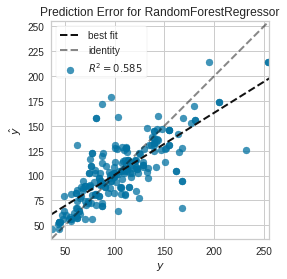

In [30]:
plot_model(model, plot = 'error')

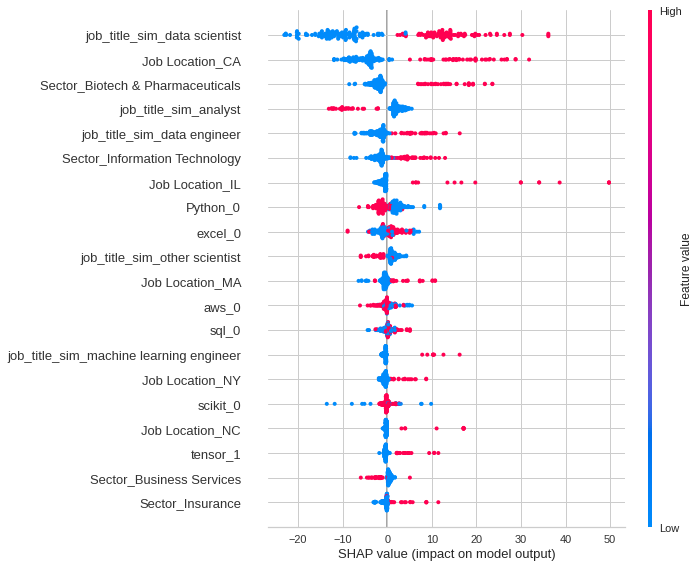

In [31]:
interpret_model(model)

In [32]:
final = finalize_model(model)

In [33]:
test = pd.DataFrame({
    'Sector' : ['Health Care'],
    'Job Location' : ['MA'],
    'Python' : [0],
    'spark' : [0],
    'aws' : [1], 
    'excel' : [0],
    'sql' : [0],
    'sas' : [0],
    'keras': [0],
    'pytorch': [0],
    'scikit' : [0],
    'tensor' : [1],
    'hadoop' : [0],
    'tableau' : [0],
    'bi' : [0],
    'flink' : [0],
    'mongo' : [0],
    'google_an' : [0],
    'job_title_sim' : ['other scientist']
})

In [ ]:
#Python	spark	aws	excel	sql	sas	keras	pytorch	scikit	tensor	hadoop	tableau	bi	flink	mongo	google_an

In [34]:
predictions = predict_model(final, data = test)

In [35]:
predictions

,Sector,Job Location,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,Label
0,Health Care,MA,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,other scientist,71.22719


In [38]:
test_1 = pd.DataFrame({
    'Sector' : ['Business'],
    'Job Location' : ['FL'],
    'Python' : [0],
    'spark' : [0],
    'aws' : [0], 
    'excel' : [0],
    'sql' : [1],
    'sas' : [0],
    'keras': [0],
    'pytorch': [0],
    'scikit' : [1],
    'tensor' : [0],
    'hadoop' : [0],
    'tableau' : [0],
    'bi' : [0],
    'flink' : [0],
    'mongo' : [1],
    'google_an' : [0],
    'job_title_sim' : ['analyst']
})

In [39]:
predictions = predict_model(final, data = test_1)

In [40]:
predictions

,Sector,Job Location,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,Label
0,Business,FL,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,analyst,87.36
